In [ ]:
import pandas as pd
from sklearn import preprocessing

In [ ]:
dataf=pd.read_csv("/content/drive/MyDrive/Dissertation/batteryData.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [ ]:
dataf = dataf.drop('0', axis=1)
dataf = dataf.drop('2', axis=1)
dataf = dataf.drop('5', axis=1)
dataf = dataf.drop('Unnamed: 0', axis=1)
dataf.shape

(162195, 4)

In [ ]:
dataf = dataf.rename({'1':'Time', '3':'Voltage', '4':'Current', '6':'Temperature'}, axis='columns')

In [ ]:
time = dataf.iloc[:,0]
current = dataf.iloc[:, 2]
temp = dataf.iloc[:, 3]
Voltage = dataf.iloc[:, 1]

In [ ]:
current = current.loc[6699:18000]
temp = temp.loc[6699:18000]
print(len(temp))

11302


In [ ]:
absoluteVal = current.abs()
absoluteVal = absoluteVal.tolist()
len(absoluteVal)

11302

In [ ]:
len_lis = len(absoluteVal)

In [ ]:
totalCurrent=[]
avgCurrent = []
nthRow = 30
n = 0
for index, x in enumerate(absoluteVal):
    #r = range(index, index + nthRow)
    #print(r)
    for i in range(index, index + nthRow):
        
        limit = i + nthRow
        if limit < len_lis:
            val = absoluteVal[limit]
            totalCurrent.append(val)
        else:
            totalCurrent = []
            break

    if len(totalCurrent) > 0:
        avg_cur = sum(totalCurrent) / len(totalCurrent)
        avgCurrent.append(avg_cur)

In [ ]:
valAvg = list(avgCurrent)
print(len(valAvg))

11243


In [ ]:
valAvg  = np.asarray(valAvg)

In [ ]:
tempy = temp[:11274]

In [ ]:
temp_list = tempy.tolist()

In [ ]:
temperature=[]
nthRowT = 31
for idx, xi in enumerate(temp_list):
    #print(nthRow)
    #print(idx, x)
    totalIndex = nthRowT + idx
    if totalIndex < len(temp_list):
        vali = temp_list[totalIndex]
        #print(val)
        temperature.append(vali)
        #print(temperature)
        #print(len(temperature))

In [ ]:
len(temperature)

11243

In [ ]:
tempPre = temp[:11284]

In [ ]:
tempPre = tempPre.tolist()

In [ ]:
temperatureP=[]
nthRowP = 41
for idxP, xP in enumerate(tempPre):
    #print(nthRow)
    #print(idx, x)
    totalIndexP = nthRowP + idxP
    if totalIndexP < len(tempPre):
      valP = tempPre[totalIndexP]
      #print(val)
      temperatureP.append(valP)
      #print(temperature)
      #print(len(temperature))

In [ ]:
tempPredict = np.asarray(temperatureP)
len(tempPredict)

11243

In [ ]:
num_list = []
for i in range(0,11243): 
   #print(i, end=",")
   num_list.append(i)

In [ ]:
num_list =  np.asarray(num_list)

In [ ]:
X = np.atleast_2d([num_list,valAvg,temperature]).T
print(X)
print(len(X))
type(X)

[[0.00000000e+00 1.03446667e+00 2.18400000e+01]
 [1.00000000e+00 9.91736667e-01 2.18400000e+01]
 [2.00000000e+00 9.35153333e-01 2.18400000e+01]
 ...
 [1.12400000e+04 1.19846524e+00 2.11300000e+01]
 [1.12410000e+04 1.19855056e+00 2.11300000e+01]
 [1.12420000e+04 1.19863466e+00 2.11300000e+01]]
11243


numpy.ndarray

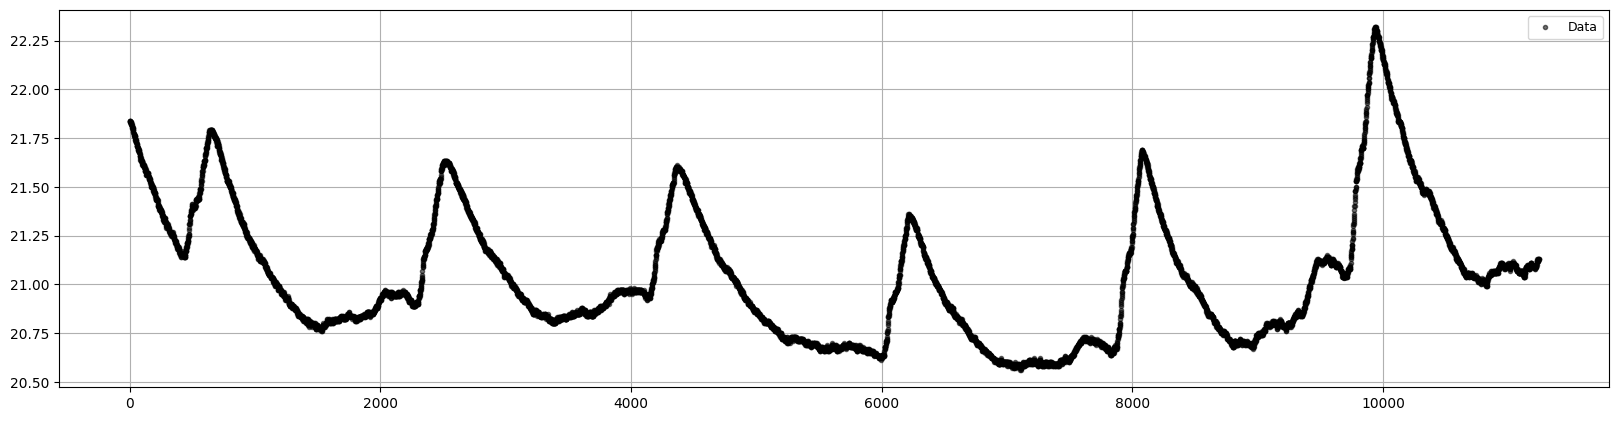

In [ ]:
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")
 
#plt.subplot(4,1,1)
plt.plot(num_list, temperature, "k.",alpha=0.55, label ='Data')
#plt.plot(X[:, 1],mean_prediction,"r", label ='predictions')
#plt.plot([min(y_pred_1),max(y_pred_1)], [min(y_pred_1),max(y_pred_1)], ls="--", c=".3")
#plt.fill_between(X[:,1], mean_prediction - sigma_1, mean_prediction + sigma_1, alpha = 0.2, color = "black", label = "95% confidance interval")
#plt.xlabel("Time")
#plt.ylabel("Temp")
plt.legend(loc="upper right", fontsize = 9)
plt.grid()
# plt.xlim(0,1000)
# plt.xlim(0,1000)
#plt.xlim(21,22)
#plt.ylim(0,1000)
#plt.ylim(0,21.9)

In [ ]:
y = np.asarray(tempPredict).T
print(len(y))
type(y)
y

11243


array([21.82, 21.82, 21.83, ..., 21.15, 21.15, 21.16])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)

In [ ]:
import pickle
pickle.dump((x_train, x_test, y_train, y_test), open("/content/drive/MyDrive/Dissertation/train_test.pkl", "wb"))
pickle.dump((X, y), open("/content/drive/MyDrive/Dissertation/XY.pkl", "wb"))

In [ ]:
len(x_train)

5621

In [ ]:
len(x_test)

5622

In [ ]:
x_train.ndim

2

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [ ]:
X_scaled = scaler.transform(x_train)
X_scaled.ndim

2

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import plotly.express as px


In [ ]:
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_scaled, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.001914 (0.002698) with: {'n_estimators': 50}
-0.001731 (0.002362) with: {'n_estimators': 100}
-0.001754 (0.002305) with: {'n_estimators': 200}
-0.001775 (0.002316) with: {'n_estimators': 300}
-0.001832 (0.002428) with: {'n_estimators': 400}
Best: -0.001731 using {'n_estimators': 100}


In [ ]:
rescaled_X_test = scaler.transform(x_test)
predictions = grid.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

0.008908518997489663


In [ ]:
predictions

array([20.68165325, 20.68165325, 20.68165325, ..., 21.09171693,
       21.09171693, 21.09171693])

In [ ]:
result = pd.DataFrame({'Y_TEST':y_test,'Y_PRED' : pd.Series(predictions).values})

In [ ]:
result

,Y_TEST,Y_PRED
0,20.68,20.681653
1,20.69,20.681653
2,20.69,20.681653
3,20.68,20.681653
4,20.68,20.681653
...,...,...
5617,21.14,21.091717
5618,21.14,21.091717
5619,21.15,21.091717
5620,21.15,21.091717


In [ ]:
px.line(data_frame = result)

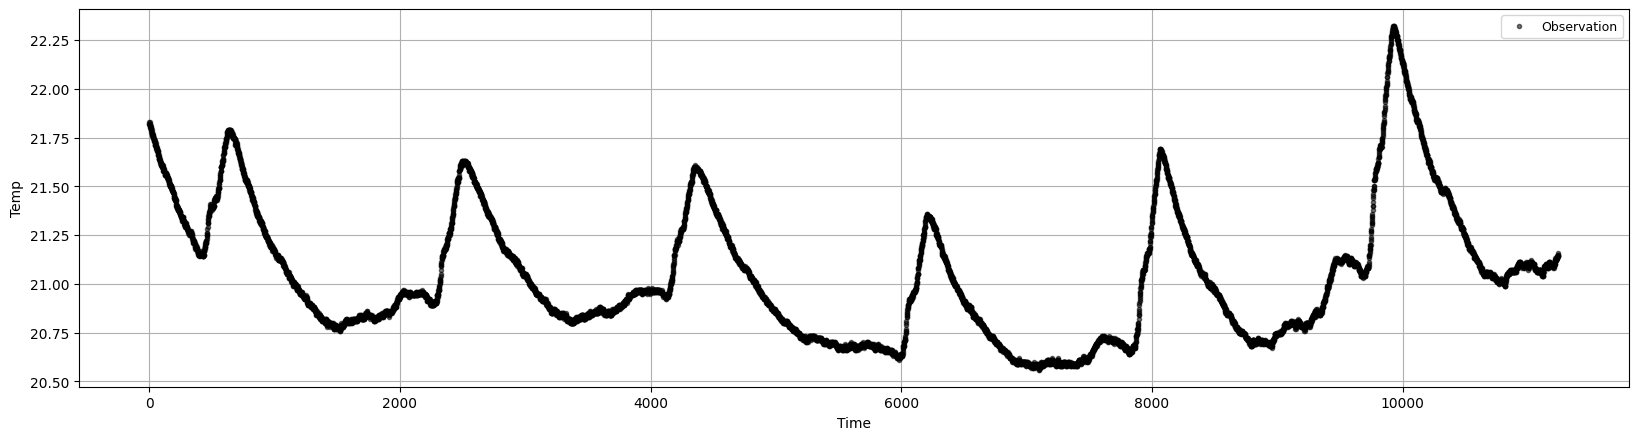

In [ ]:
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")

 

#plt.subplot(4,1,1)

#plt.plot(x_train[:, 0], y_train, "k.",alpha=0.55, label ='Observation')

plt.plot(X[:, 0],y,"k.",alpha=0.55, label ='Observation')

#plt.plot(x_test[:, 0],predictions,"r", label ='predictions')

#plt.plot([min(y_pred_1),max(y_pred_1)], [min(y_pred_1),max(y_pred_1)], ls="--", c=".3")

#plt.errorbar(X[:, 0],mean_prediction,yerr=std_error)

#plt.fill_between(x_test[:, 0], predictions - 0.5, predictions + 0.5, alpha = 0.2, color = "black", label = "95% confidance interval")

plt.xlabel("Time")

plt.ylabel("Temp")

plt.legend(loc="upper right", fontsize = 9)

plt.grid()

#plt.xlim(2900,2945)

# plt.xlim(0,1000)

#plt.xlim(21,22)

#plt.ylim(0,1000)

#plt.ylim(21.10,21.15)

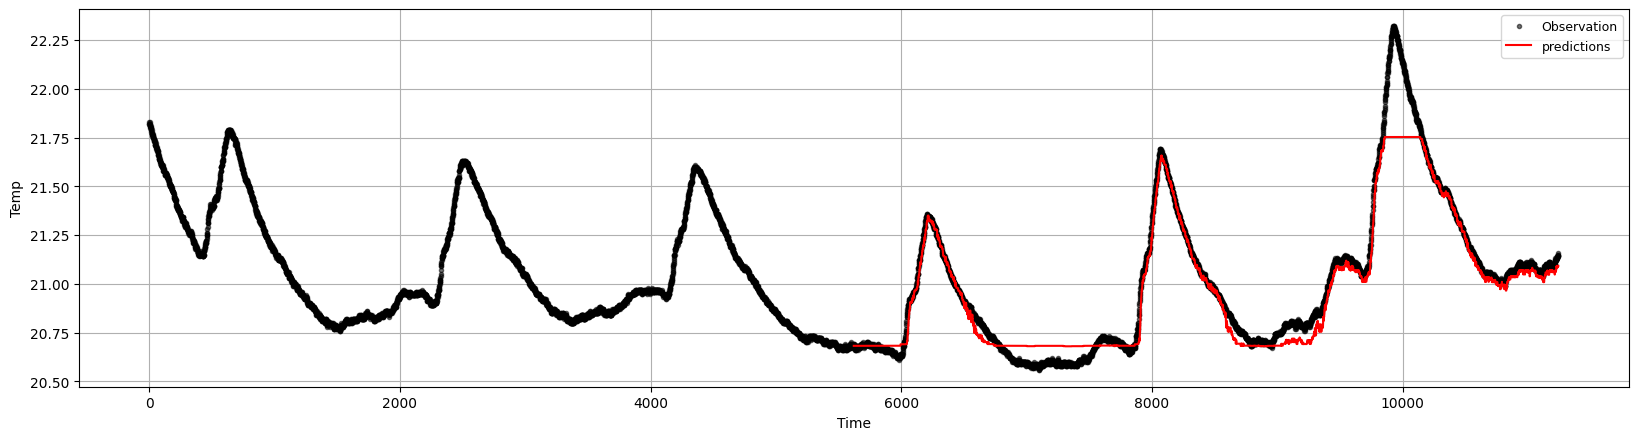

In [ ]:
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")

 

#plt.subplot(4,1,1)

#plt.plot(x_train[:, 0], y_train, "k.",alpha=0.55, label ='Observation')

plt.plot(X[:, 0],y,"k.",alpha=0.55, label ='Observation')

plt.plot(x_test[:, 0],predictions,"r", label ='predictions')

#plt.plot([min(y_pred_1),max(y_pred_1)], [min(y_pred_1),max(y_pred_1)], ls="--", c=".3")

#plt.errorbar(X[:, 0],mean_prediction,yerr=std_error)

#plt.fill_between(x_test[:, 0], predictions - 0.5, predictions + 0.5, alpha = 0.2, color = "black", label = "95% confidance interval")

plt.xlabel("Time")

plt.ylabel("Temp")

plt.legend(loc="upper right", fontsize = 9)

plt.grid()

#plt.xlim(2900,2945)

# plt.xlim(0,1000)

#plt.xlim(21,22)

#plt.ylim(0,1000)

#plt.ylim(21.10,21.15)

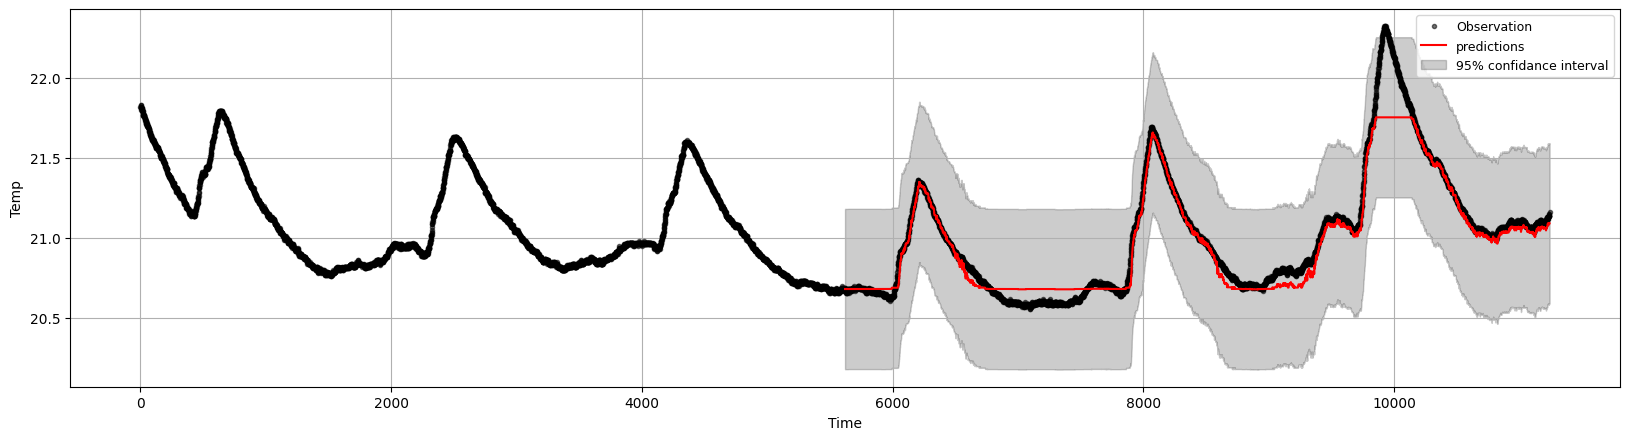

In [ ]:
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")

 

#plt.subplot(4,1,1)

#plt.plot(x_train[:, 0], y_train, "k.",alpha=0.55, label ='Observation')

plt.plot(X[:, 0],y,"k.",alpha=0.55, label ='Observation')

plt.plot(x_test[:, 0],predictions,"r", label ='predictions')

#plt.plot([min(y_pred_1),max(y_pred_1)], [min(y_pred_1),max(y_pred_1)], ls="--", c=".3")

#plt.errorbar(x_test[:, 0],predictions)

plt.fill_between(x_test[:, 0], predictions - 0.5, predictions + 0.5, alpha = 0.2, color = "black", label = "95% confidance interval")

plt.xlabel("Time")

plt.ylabel("Temp")

plt.legend(loc="upper right", fontsize = 9)

plt.grid()

#plt.xlim(2900,2945)

# plt.xlim(0,1000)

#plt.xlim(21,22)

#plt.ylim(0,1000)

#plt.ylim(21.10,21.15)

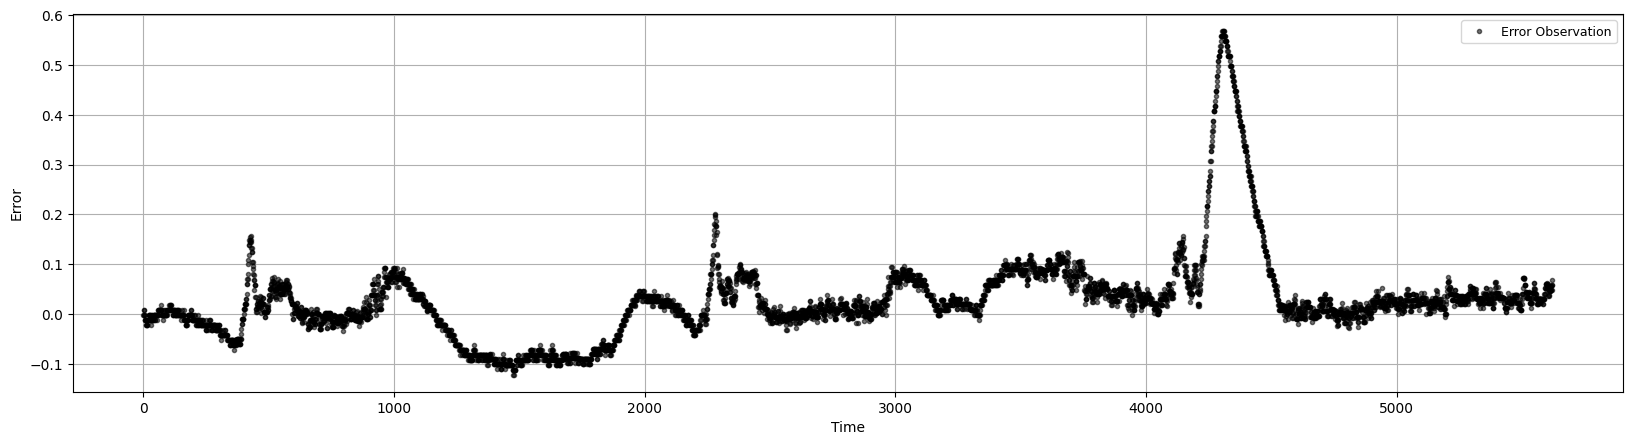

In [ ]:
#max Error
error = []
for i, x in enumerate(predictions):
  # print(y_test[i])
  # print(predictions[i])
  # break
  err = y_test[i] - predictions[i]
  error.append(err)
fig = plt.figure( figsize=(20,5), dpi = 100, facecolor="w", edgecolor = "k")

plt.plot(error, "k.",alpha=0.55, label ='Error Observation')
plt.xlabel("Time")
plt.ylabel("Error")
plt.legend(loc="upper right", fontsize = 9)
plt.grid()
#plt.xlim(22,22.25)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE=', mean_absolute_error(y_test, predictions))
print('MSE=', mean_squared_error(y_test, predictions))
print('RMSE=', mean_squared_error(y_test, predictions, squared=False))

MAE= 0.05444944431015952
MSE= 0.008908518997489663
RMSE= 0.09438495111769493
